<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1">Introduction</a></span></li><li><span><a href="#Exploratory-Data-Analysis" data-toc-modified-id="Exploratory-Data-Analysis-2">Exploratory Data Analysis</a></span></li><li><span><a href="#Feature-Scaling" data-toc-modified-id="Feature-Scaling-3">Feature Scaling</a></span></li><li><span><a href="#Principal-Component-Analysis" data-toc-modified-id="Principal-Component-Analysis-4">Principal Component Analysis</a></span><ul class="toc-item"><li><span><a href="#Choice-on-number-of-principal-components..." data-toc-modified-id="Choice-on-number-of-principal-components...-4.1">Choice on number of principal components...</a></span></li></ul></li><li><span><a href="#Principal-component-intuition" data-toc-modified-id="Principal-component-intuition-5">Principal component intuition</a></span></li></ul></div>

# Introduction
I would like to demonstrate how to use principal component analysis to reduce the dimensionality of a dataset, specifically the **breast_cancer** dataset from the scikit-learn package.
This example is inspired from the following course, where it is covered: [Python for Data Science and Machine Learning Bootcamp](https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_breast_cancer

/Users/philip_p/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Exploratory Data Analysis

In [2]:
cancer_data = load_breast_cancer()

In [15]:
# cancer_data.keys()
print(cancer_data['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [8]:
cancer_df = pd.DataFrame(cancer_data['data'],
                         columns=cancer_data['feature_names'])

In [10]:
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


The input data, or observations of the characteristics of the tumours is found in the dataset using: 
```
> cancer_data['data']
```
Whilst the response variable, if the cancer is malignant (0) or benign (1), can be found in the target variable, found using:
```
> cancer_data['target']
```

# Feature Scaling
As we can see above, the scales of all of the variables in the data (**cancer_df**) are not similar, therefore we need to carry out feature scaling (also called normalisation and standardisation. This is crucial to ensure that significant values (such as mean area, when compared to mean smoothness) does not dominate the model due to its large magnitude.

We will use the scaling tool build into scikit-learn, StandardScaler, to scale each feature and ensure it has single unit variance. We will do this in the steps below.

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(cancer_df)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
scaled_data = scaler.transform(cancer_df)

Here we can look at the scaled data:

In [23]:
pd.DataFrame(data=scaled_data, columns=cancer_data['feature_names']).head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391


To check that the data has unit variance, and mean centred around zero, we can look at the describe method on the dataframe, and confirm the features have been scaled to have a mean centred around 0, and a standard deviation of 1.

In [26]:
pd.DataFrame(data=scaled_data, columns=cancer_data['feature_names']).describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,...,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.162867e-15,-6.530609e-15,-7.078891e-16,-8.799835e-16,6.132177e-15,-1.120369e-15,-4.421380e-16,9.732500e-16,-1.971670e-15,-1.453631e-15,...,-2.333224e-15,1.763674e-15,-1.198026e-15,5.049661e-16,-5.213170e-15,-2.174788e-15,6.856456e-16,-1.412656e-16,-2.289567e-15,2.575171e-15
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,...,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-2.029648e+00,-2.229249e+00,-1.984504e+00,-1.454443e+00,-3.112085e+00,-1.610136e+00,-1.114873e+00,-1.261820e+00,-2.744117e+00,-1.819865e+00,...,-1.726901e+00,-2.223994e+00,-1.693361e+00,-1.222423e+00,-2.682695e+00,-1.443878e+00,-1.305831e+00,-1.745063e+00,-2.160960e+00,-1.601839e+00
25%,-6.893853e-01,-7.259631e-01,-6.919555e-01,-6.671955e-01,-7.109628e-01,-7.470860e-01,-7.437479e-01,-7.379438e-01,-7.032397e-01,-7.226392e-01,...,-6.749213e-01,-7.486293e-01,-6.895783e-01,-6.421359e-01,-6.912304e-01,-6.810833e-01,-7.565142e-01,-7.563999e-01,-6.418637e-01,-6.919118e-01
50%,-2.150816e-01,-1.046362e-01,-2.359800e-01,-2.951869e-01,-3.489108e-02,-2.219405e-01,-3.422399e-01,-3.977212e-01,-7.162650e-02,-1.782793e-01,...,-2.690395e-01,-4.351564e-02,-2.859802e-01,-3.411812e-01,-4.684277e-02,-2.695009e-01,-2.182321e-01,-2.234689e-01,-1.274095e-01,-2.164441e-01
75%,4.693926e-01,5.841756e-01,4.996769e-01,3.635073e-01,6.361990e-01,4.938569e-01,5.260619e-01,6.469351e-01,5.307792e-01,4.709834e-01,...,5.220158e-01,6.583411e-01,5.402790e-01,3.575891e-01,5.975448e-01,5.396688e-01,5.311411e-01,7.125100e-01,4.501382e-01,4.507624e-01
max,3.971288e+00,4.651889e+00,3.976130e+00,5.250529e+00,4.770911e+00,4.568425e+00,4.243589e+00,3.927930e+00,4.484751e+00,4.910919e+00,...,4.094189e+00,3.885905e+00,4.287337e+00,5.930172e+00,3.955374e+00,5.112877e+00,4.700669e+00,2.685877e+00,6.046041e+00,6.846856e+00


Since there are so many features in this dataset, we'd like to get a sense of which features are important in trying to distinguish if a tumour is malignant or benign. So, in this case, we will reduce the dimensionality of the data using principal component analysis, to map the 30-dimensional space onto a lower dimension, and attempt to visualise the data.

# Principal Component Analysis

Generally it is quite difficult to visualise more than 2, or 3 dimensions. So, with this 30-dimensional dataset, we will attempt to carry out a dimensionality reduction using two principal components. That is, we will be mapping the data from 30-dimensional space, to two dimensions.

In [31]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)

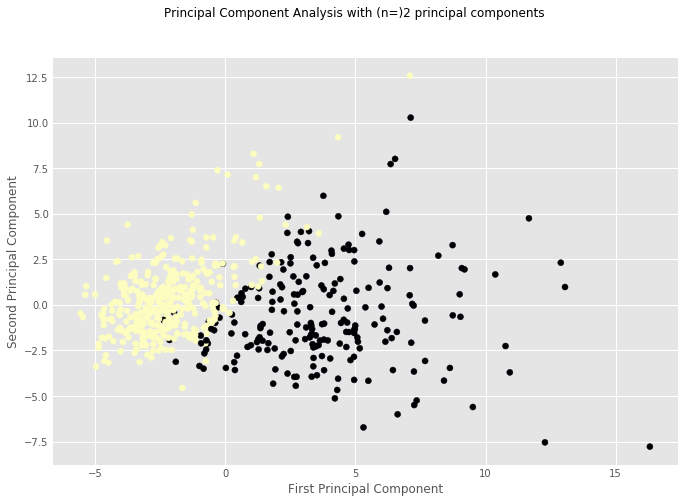

In [56]:
plt.style.use('ggplot')
plt.figure(figsize=(10, 7))
plt.scatter(x=x_pca[:,0],
            y=x_pca[:,1],
            marker='o',
            c=cancer_data['target'], # the colouring is according to malignant/benign
            cmap='magma')
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")
plt.suptitle("Principal Component Analysis with (n=)2 principal components")
plt.show()


Here, we can see quite a clear difference between the malignant (white) and benign tumours (black), in terms of the separation between the values of the principal components.

It would appear that using the principal component analysis dimensionality reduction to two principal components gives a clear separation between the malignant and benign tumours. It appears, at first glance, that quite a lot of the variation in the original, 30-dimensional dataset can be explained with two principal components.

## Choice on number of principal components...
In order to establish what is a good number of components to choose for principal component analysis, one can see what percentage of the overall variation in the data described by each principal component. For this task, one would look at the eigenvalues of the problem, and these are sorted from the largest to the smallest.

In this case, we have this stored within the PCA object from *sklearn*

In [70]:
pca.explained_variance_ratio_

array([0.44272026, 0.18971182])

Therefore, in this case, we can see that the explained variance by the first two principal components is 44.3% and 19% of the variance. So, we can compress the dimensions of the data down to two dimensions, and still keep almost two-thirds of the variation in the data.

Below we can use the principal component analysis algorithm to fit a few more dimensionality reductions and observe how much variation can be covered by compressing the data.

In [82]:
pca_three = PCA(n_components=3)
pca_three.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [83]:
pca_three.explained_variance_ratio_
# np.sum(pca_three.explained_variance_ratio_)

array([0.44272026, 0.18971182, 0.09393163])

It looks like adding another principal component can explain 9.4% more of the variation in the original dataset, so overall we can explain 73% of the variation of the original data using just 3 principal components

In [84]:
pca_four = PCA(n_components=4)
pca_five = PCA(n_components=5)
pca_four.fit(scaled_data)
pca_five.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Comparing the amount of variation explained by each of the principal components, we have:

In [96]:
np.array([pca.explained_variance_ratio_, pca_three.explained_variance_ratio_])

array([array([0.44272026, 0.18971182]),
       array([0.44272026, 0.18971182, 0.09393163])], dtype=object)

In [133]:
pca_summary = pd.DataFrame(data=
             100*np.array(
                 [np.sum(pca.explained_variance_ratio_),
                  np.sum(pca_three.explained_variance_ratio_),
                  np.sum(pca_four.explained_variance_ratio_),
                  np.sum(pca_five.explained_variance_ratio_)]
             ),
             index=['Two', 'Three', 'Four', 'Five']
            )
pca_summary.columns = ['Percentage of variation explained, %']
pca_summary.index.name = 'Number of principal components'

Text(0, 0.5, 'Variation Explained (%) of original dataset')

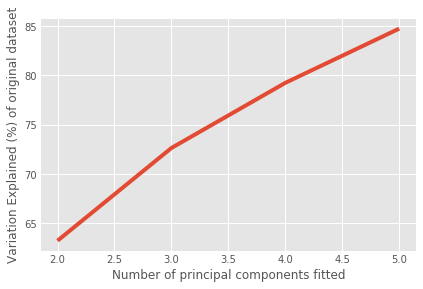

In [134]:
plt.plot([2,3,4,5],pca_summary.values)
plt.xlabel("Number of principal components fitted")
plt.ylabel("Variation Explained (%) of original dataset")

In [135]:
pd.options.display.float_format = '{:,.2f}'.format

In [136]:
pca_summary

,"Percentage of variation explained, %"
Number of principal components,
Two,63.24
Three,72.64
Four,79.24
Five,84.73


# Principal component intuition
Whilst it is useful to achieve dimensionality reduction using principal component analysis, the intuition of a principal component is not as basic as saying that the first principal component corresponds to the *mean_concavity* feature (how concave in shape the tumour is), for example.

Instead what the components correspond to is a linear combination of the input features. Let's see this below:

In [137]:
components_df = pd.DataFrame(pca.components_, columns=cancer_data['feature_names'])
components_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.22,0.10,0.23,0.22,0.14,0.24,0.26,0.26,0.14,0.06,...,0.23,0.10,0.24,0.22,0.13,0.21,0.23,0.25,0.12,0.13
1,-0.23,-0.06,-0.22,-0.23,0.19,0.15,0.06,-0.03,0.19,0.37,...,-0.22,-0.05,-0.20,-0.22,0.17,0.14,0.10,-0.01,0.14,0.28


Above, we see that the first principal component, with the row name *0*, is a combination of the original input components (which have been feature scaled):
\
\begin{align}
    PrincipalComponent_1 = 0.219*x_1 + 0.104*x_2 + 0.228*x_3
\end{align}
\
where $x_1$ is the mean radius, $x_2$ the mean texture, $x_3$ the mean perimeter, and so on...

Below we will plot a heatmap of the first two principal components, the intuition being that the lighter (/darker) colours show higher (/lower) correlation with the specific feature in the columns. 

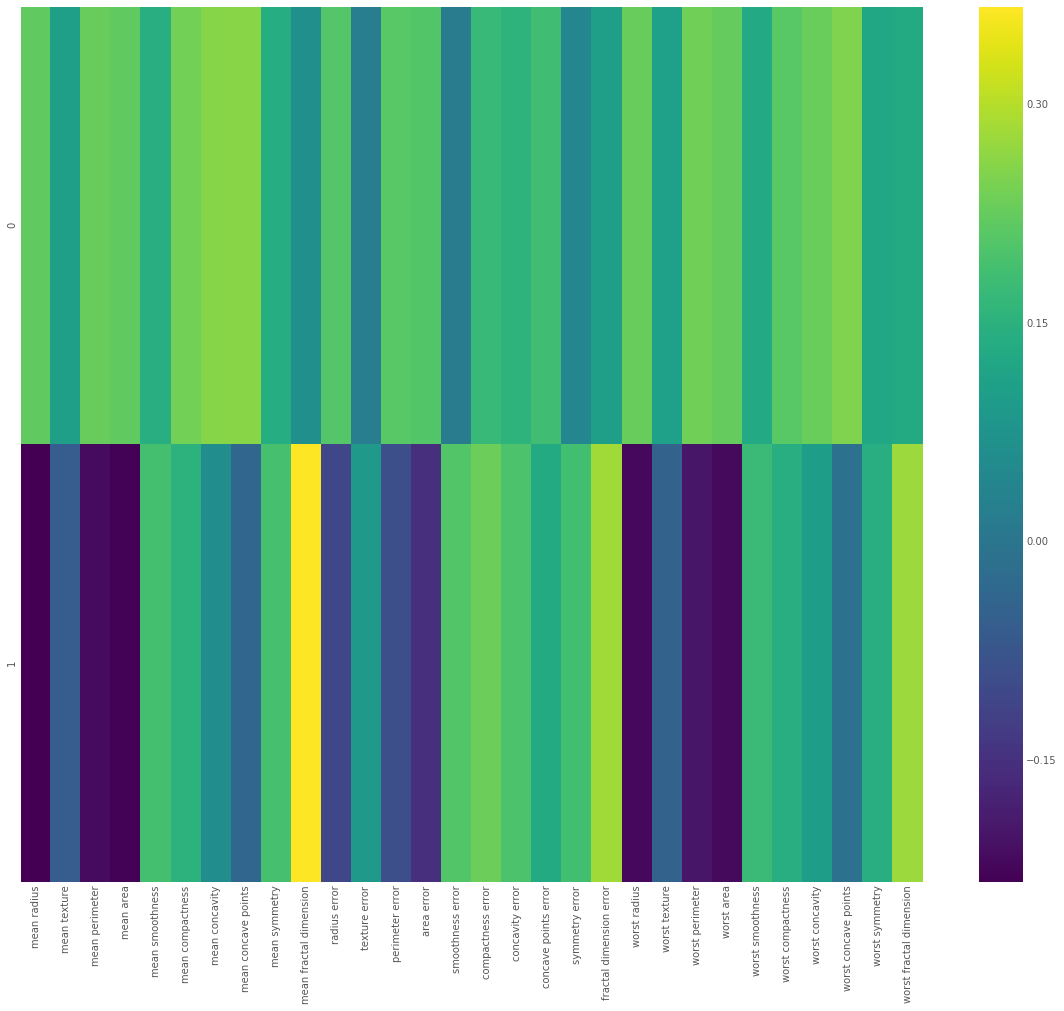

In [138]:
plt.figure(figsize=(18,15))
sns.heatmap(components_df, cmap='viridis')

In this case, for example, we see that the second principal component has a high weighting of **mean symmetry** (due to the light yellow colour).